<a href="https://colab.research.google.com/github/leusto/hackathon/blob/main/LLM_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

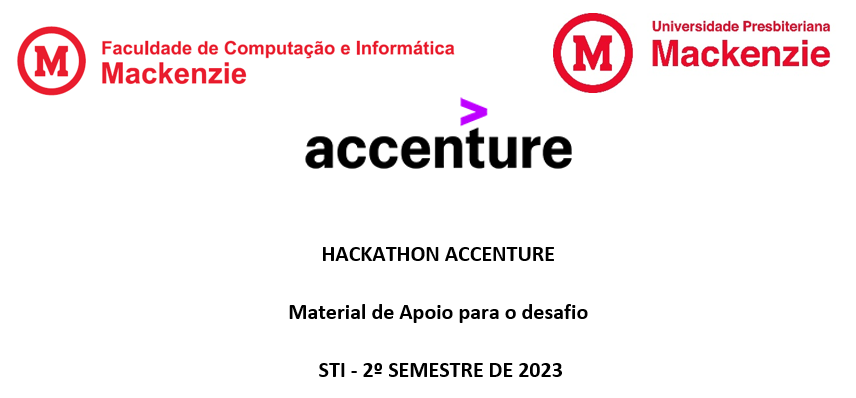<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

# ChatGPT with Python

O uso de grandes modelos de linguagem vem se popularizando a partir de um de prompts. Mas uma forma mais poderosa de empregar esses modelos é através de uma linguagem de programação permitindo criar aplicações sobre as funcionalidades desses poderosos modelos. Você vai ter uma demonstração e aprender um pouco sobre isso aqui.

# Before Start

Primeiro você precisa criar uma conta OpenAI (gratuita):

* https://platform.openai.com/signup/, ou em
* https://openai.com/blog/openai-api.

Depois você precisará criar uma chave de API que permitirá você enviar solicitações ao OpenAI:

* https://platform.openai.com/account/api-keys

Você pode verificar os preços e uso dos serviços nos mesmos site. Proteja sua API Key e, particularmente, não deixe ela em repositórios públicos.


# Install

In [ ]:
!pip install --upgrade openai

# Access

In [6]:
import openai

In [7]:
!pip install --upgrade json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [8]:
import json

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
with open("/content/drive/MyDrive/api-keys/openai.json") as json_file:
    data = json.load(json_file)

In [12]:
openai_apikey = data['openai']['api_key']

In [13]:
#openai_apikey = "sk-Ixxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx9p"
openai.api_key = openai_apikey

MODEL = "gpt-3.5-turbo"
CONTENT = "Hello ChatGPT!"

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

In [ ]:
response

In [ ]:
print(response.choices[0].message.content)

Hello! How can I assist you today?


# Make a Question

In [ ]:
CONTENT = "Qual o nome dos principais concorrentes da OpenAI?"

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

# Automação de Python

In [ ]:
CONTENT = """Crie um DataFrame do valor Diário de Ações da Bolsa com os seguintes atributos:

Nome do Ativo,
Data,
Valor_Abertura,
Valor_Fechamento

Popule com 20 dados fictícios.
"""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

## Empregando diretamente a saída

In [ ]:
import pandas as pd
import numpy as np

# Criando a lista com os dados fictícios
ativos = ['PETR4', 'VALE3', 'BBAS3', 'ITSA4', 'BBDC4', 'ITUB4', 'B3SA3', 'ABEV3', 'VVAR3', 'JBSS3', 'GOAU4', 'IRBR3', 'ELET3', 'GOLL4', 'RENT3', 'USIM5', 'COGN3', 'LCAM3', 'CSNA3', 'AZUL4']
datas = pd.date_range(start='2022-01-01', end='2022-01-20', freq='D')
valores_abertura = np.random.uniform(low=20, high=100, size=20).round(2)
valores_fechamento = np.random.uniform(low=20, high=100, size=20).round(2)

# Criando o DataFrame
df = pd.DataFrame({'Nome do Ativo': ativos,
                   'Data': datas,
                   'Valor_Abertura': valores_abertura,
                   'Valor_Fechamento': valores_fechamento})

# Visualizando as primeiras linhas do DataFrame
df.head()

## Empregando a saída como entrada para um programa

In [70]:
del df

In [ ]:
response

In [ ]:
exec( response.choices[0].message.content )
df.head()

In [ ]:
CONTENT = """Forneça o código para, no DataFrame anterior,
retornar os valores médios de Valor_Abertura e Valor_Fechamento diários."""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

## Empregando diretamente a saída

In [ ]:
df.groupby('Data')[['Valor_Abertura', 'Valor_Fechamento']].mean()

In [ ]:
CONTENT = """Forneça o código para, no DataFrame anterior,
para criar um gráfico da evolução dos valores médios diários de Valor_Abertura e Valor_Fechamento."""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

## Empregando diretamente a saída

Aqui, tive de fazer um pequeno ajuste no código, trocando `dados` por `df`. Ainda ajustei ao tamanho da figura.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
# calcular os valores médios diários de Valor_Abertura e Valor_Fechamento
media_abertura = df.groupby('Data')['Valor_Abertura'].mean()
media_fechamento = df.groupby('Data')['Valor_Fechamento'].mean()

# criar um gráfico de linhas com os valores médios diários
plt.plot(media_abertura.index, media_abertura.values, label='Abertura')
plt.plot(media_fechamento.index, media_fechamento.values, label='Fechamento')

# adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.title('Evolução dos valores médios diários de Abertura e Fechamento')

# exibir o gráfico
plt.show()

# Langchain

[**LangChain**](https://www.langchain.com/) é um *framework* para desenvolvimento de aplicações usando Grandes Modelos de Linguagem (LLMs). Essa biblioteca fornece uma interface padrão e extensível para interagir com LLMs de diferentes provedores, bem como utilitários comuns para trabalhar com LLMs.

**LangChain** é construído em cima da biblioteca Python PyTorch e é compatível com uma variedade de LLMs, incluindo ChatGPT, Jurassic-1 Jumbo e Megatron-Turing NLG, e sua interface simples facilita a construção de aplicações que usam LLMs.

O LangChain pode ser usado para:

- Chatbots
- Geração de texto (código, scripts, e-mails padrão, cartas, contratos, descritivos de produtos etc.)
- Tradução de texto
- Resumo de textos

Além de resposta diretas a perguntas.

In [ ]:
!pip install langchain

In [2]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import pandas as pd

In [14]:
import os

os.environ['OPENAI_API_KEY'] = openai.api_key

## Summarize a Text (*prompt like*)

In [32]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0, openai_api_key=openai_apikey)

In [33]:
prompt = """
Por favor forneça o resumo do seguinte texto.
Por favor forneça um resumo de modo que um estudante que tenha completado apenas o nível médio possa compreender.

TEXTO:
O entrelaçamento quântico (ou emaranhamento quântico, como é mais conhecido na comunidade científica) é um fenômeno da mecânica quântica que permite que dois ou mais objetos estejam de alguma forma tão ligados que um objeto não possa ser corretamente descrito sem que a sua contra-parte seja mencionada - mesmo que os objetos possam estar espacialmente separados por milhões de anos-luz. Isso leva a correlações muito fortes entre as propriedades físicas observáveis das diversas partículas subatômicas. O entrelaçamento quântico foi chamado de "ação fantasmagórica à distância" por Albert Einstein, que acreditava ser um evento impossível, sob as leis da mecânica quântica ortodoxa.[1][2]

Essas fortes correlações fazem com que as medidas realizadas numa delas pareçam estar a influenciar instantaneamente à outra com a qual ficou entrelaçada, e sugerem que alguma influência estaria a propagar-se instantaneamente, apesar da separação entre elas. Mas o entrelaçamento quântico não permite a transmissão a uma velocidade superior à da velocidade da luz, porque nenhuma informação útil pode ser transmitida desse modo. Só é possível a transmissão de informação usando um conjunto de estados entrelaçados em conjugação com um canal de informação clássico - aquilo a que se chama o teletransporte quântico. Isto dá a entender que tudo está conectado por "forças" que não vemos e que permanecem no tempo, ou estão fora do sistema que denominamos, entendemos ou concebemos como sistema temporal.

O entrelaçamento quântico é a base para tecnologias emergentes, tais como computação quântica, criptografia quântica e tem sido usado para experiências como o teletransporte quântico. Ao mesmo tempo, isto produz alguns dos aspectos teóricos e filosóficos mais perturbadores da teoria, já que as correlações previstas pela mecânica quântica são inconsistentes com o princípio intuitivo do realismo local, que diz que cada partícula deve ter um estado bem definido, sem que seja necessário fazer referência a outros sistemas distantes. Os diferentes enfoques sobre o que está a acontecer no processo do entrelaçamento quântico dão origem a diferentes interpretações da mecânica quântica.
"""

In [ ]:
!pip install tiktoken

In [35]:
import tiktoken

num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 865 tokens


In [36]:
output = llm(prompt)
print (output)


O entrelaçamento quântico é um fenômeno da mecânica quântica que liga dois ou mais objetos, mesmo que estejam separados por milhões de anos-luz. Isso leva a correlações muito fortes entre as propriedades físicas observáveis das partículas subatômicas, que parecem influenciar-se instantaneamente. O entrelaçamento quântico é usado para tecnologias emergentes, como computação quântica e criptografia quântica, e também produz alguns dos aspectos teóricos e filosóficos mais perturbadores da teoria.


## Summarize a Text (*.pdf article)

In [34]:
!pip install PyPDF2

In [54]:
from PyPDF2 import PdfReader

In [67]:

# This function is reading PDF from the start page to final page
# given as input (if less pages exist, then it reads till this last page)

def get_pdf_text(document_path, start_page=1, final_page=1):
  reader = PdfReader(document_path)
  number_of_pages = len(reader.pages)
  page = reader.pages[1].extract_text()

  for page_num in range(start_page - 1, min(number_of_pages, final_page)):
    page += reader.pages[page_num].extract_text()
  return page

page = get_pdf_text('/content/drive/MyDrive/Lattes_Leandro_Augusto_Silva.pdf')

In [ ]:
from langchain.chains import AnalyzeDocumentChain
from langchain.chains.summarize import load_summarize_chain
from langchain.llms import OpenAI

llm = OpenAI(temperature=0, openai_api_key=openai_apikey)

summary_chain = load_summarize_chain(llm=llm, chain_type='map_reduce')
summarize_document_chain = AnalyzeDocumentChain(combine_docs_chain=summary_chain)
print('output(AnalyzeDocumentChain):', summarize_document_chain.run(page))

## Question Answering in a Text (*.pdf article)

In [ ]:
pip install pypdf

In [40]:
# load document
from langchain.document_loaders import PyPDFLoader
import pypdf


In [59]:
import pypdf

In [85]:
loader = PyPDFLoader("/content/drive/MyDrive/Lattes_Leandro_Augusto_Silva.pdf")
documents = loader.load()

In [69]:
from langchain.chains import AnalyzeDocumentChain
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain
chain = load_qa_chain(llm=llm, chain_type = "map_reduce")


In [86]:
query = "Onde o Leandro fez Doutorado?"
chain.run(input_documents = documents, question=query)

' Leandro fez Doutorado na Escola Politécnica da Universidade de São Paulo, POLI/USP, Brasil.'

In [88]:
query = "Quais os Projetos de desenvolvimento?"
chain.run(input_documents = documents, question=query)

' Os projetos de desenvolvimento são: SiCaME - Sistema de Cadastro e Monitoramento de Evento; SaOC - Sistema de apoio a Otimização Curricular; GAC - Sistema de Gerenciamento de Atividades Complementares; Sistema computacional para Gerenciamento de Atividades Complementares - GAC; SASPPG - Sistema de Análise e Simulação para Programas de Pós-Graduação.'

# Try to learn something different! 😀